# Why Employees Leave: Data-Driven HR Analytics & Attrition Modeling

👤 About the Author
Metin Faruk Us

Graduate of Dokuz Eylül University - Public Administration.
5 years of operational field experience.
Transitioning domain expertise into Data-Driven decision making.

# 1. Introduction

Employee attrition represents a critical organizational challenge with significant financial and operational implications. 
High turnover rates increase recruitment and training costs, disrupt team cohesion, and negatively affect long-term strategic performance.

Attrition is a multidimensional phenomenon influenced by structural, economic, psychosocial, and environmental determinants. 
Factors such as overtime intensity, promotion delays, job satisfaction, workplace relationships, and commuting distance may jointly shape employee retention outcomes.

This project develops an interpretable machine learning framework designed not only to predict employee attrition risk, but also to translate predictive outputs into actionable workforce insights.

The framework integrates:

- Probabilistic attrition risk estimation,
- Comparative evaluation of structural and psychosocial determinants,
- Threshold optimization to improve detection of at-risk employees,
- Explainable AI (SHAP) analysis for global and individual interpretability,
- Risk segmentation to support data-driven workforce prioritization.

By combining predictive modeling and explainability, the study moves beyond pure classification toward structured decision-support for human resource analytics.

# 2. Problem Definition

This research addresses a supervised binary classification problem:

- Target Variable: `Attrition`
- Class Labels: Yes (employee leaves) / No (employee stays)
- Objective: To estimate individual attrition probability while identifying the key structural and psychosocial drivers influencing turnover risk.

Rather than focusing solely on classification accuracy, the study emphasizes:

- Recall optimization for high-risk employee detection,
- Model transparency and interpretability,
- Translation of probability outputs into actionable risk tiers.

The analytical pipeline integrates:

- Exploratory data analysis,
- Feature preprocessing and scaling,
- Logistic Regression modeling,
- Threshold optimization,
- SHAP-based explainability,
- Risk segmentation and dashboard visualization.

## Machine Learning Approach

This is a supervised binary classification problem:

- Target variable: Attrition (Yes / No)
- Evaluation metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC
- Final Model: Logistic Regression (interpretable baseline model)
- Enhancement: Classification threshold optimization to improve recall
- Explainability: SHAP (global and individual feature contribution analysis)

The modeling strategy prioritizes interpretability and operational usability over black-box performance maximization.


In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

print("Libraries loaded successfully.")


Libraries loaded successfully.


# 3. Data Acquisition and Initial Exploration

Prior to conducting inferential or predictive analysis, a comprehensive structural assessment of the dataset is undertaken. 
This preliminary phase aims to ensure data integrity, clarify variable composition, and establish an informed foundation for subsequent analytical procedures.

The following aspects are systematically examined:

- The dimensional structure of the dataset (observations and features),
- Variable data types and measurement scales,
- Statistical properties of numerical variables,
- Structural consistency and completeness of records.

This stage serves as a methodological prerequisite for robust exploratory and predictive modeling.

## 3.1 Data Loading

In [2]:
# Load dataset
df = pd.read_csv("data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display first 5 observations
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 3.2 Structural Overview

A structural examination of the dataset is conducted to evaluate its dimensionality, variable distributions, and overall composition. 
Descriptive statistical measures are computed for numerical attributes to assess central tendency, dispersion, and potential skewness.

Simultaneously, categorical variables are reviewed to determine frequency distributions and encoding formats. 
This systematic inspection enables the identification of potential preprocessing requirements and analytical constraints.


In [3]:
# Dataset dimensions
print("Dataset shape:", df.shape)


Dataset shape: (1470, 35)


In [4]:
# Data structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Descriptive statistics for numerical variables
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Descriptive statistics for categorical variables
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## 3.3 Variable Classification and Cardinality

To facilitate appropriate analytical treatment, variables are categorized according to their measurement scales and functional roles within the modeling framework.

In particular, the analysis includes:

- Classification of variables into numerical and categorical groups,
- Evaluation of categorical variable cardinality,
- Identification of features with high unique value counts.

Cardinality assessment is especially relevant for encoding strategy selection and model generalizability considerations.


In [7]:
# Separate variable types
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Variables:", len(num_cols))
print("Categorical Variables:", len(cat_cols))


Numerical Variables: 26
Categorical Variables: 9


In [8]:
# Cardinality check
df[cat_cols].nunique().sort_values(ascending=False)


JobRole           9
EducationField    6
MaritalStatus     3
Department        3
BusinessTravel    3
Attrition         2
Gender            2
OverTime          2
Over18            1
dtype: int64

## 3.4 Data Cleaning and Preprocessing Decisions

During structural inspection, certain variables are identified as analytically redundant or non-informative. 
Specifically, constant variables exhibiting no variance and identifier-type variables lacking behavioral relevance are excluded from further analysis.

The removal of such features enhances model interpretability, reduces dimensional noise, and ensures that subsequent analyses focus exclusively on explanatory attributes.


In [9]:
# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
constant_cols


['EmployeeCount', 'Over18', 'StandardHours']

In [10]:
# Drop non-informative variables
df = df.drop(["EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1)

# Confirm new shape
df.shape


(1470, 32)

In [11]:
# Redefine feature groups after preprocessing
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


# 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is conducted to uncover statistical patterns, structural disparities, and potential determinants associated with employee attrition.

This phase aims to:

- Evaluate the distributional properties of the target variable,
- Examine feature-level differences between attrition groups,
- Identify multidimensional determinants that may influence turnover behavior.

The insights derived from this section inform both feature engineering strategies and predictive modeling decisions.


## 4.1 Target Variable Analysis

A preliminary examination of the target variable is essential to assess class distribution and potential imbalance. 
The frequency and proportional representation of attrition outcomes are evaluated to determine whether corrective modeling techniques (e.g., reweighting or resampling) may be required.

Understanding the baseline distribution establishes the empirical context within which subsequent determinant analyses are interpreted.


In [12]:
# Target distribution (counts and proportions)
attrition_counts = df["Attrition"].value_counts()
attrition_ratio = df["Attrition"].value_counts(normalize=True)

print("Counts:")
print(attrition_counts)

print("\nProportions:")
print(attrition_ratio)

Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Proportions:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


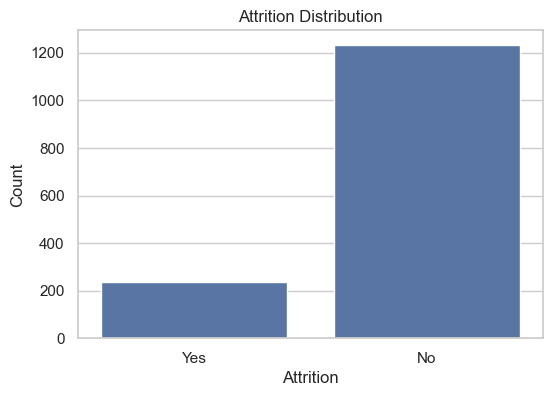

In [13]:
# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

## 4.2 Economic Determinants of Attrition

Economic theory and human capital frameworks posit that compensation and career-related incentives play a central role in employee retention decisions.

Accordingly, this section investigates compensation structures and career progression indicators to assess their association with attrition outcomes. 
The objective is to determine whether economic disparities correspond to statistically observable differences in turnover behavior.


### 4.2.1 Monthly Income Distribution by Attrition

Monthly income is examined as a primary economic determinant of attrition. 
Comparative distributional analysis is performed to evaluate central tendency, dispersion, and concentration patterns across attrition groups.

Particular attention is given to median differentials and interquartile spread, as these measures provide robust insights into income-related turnover risk.

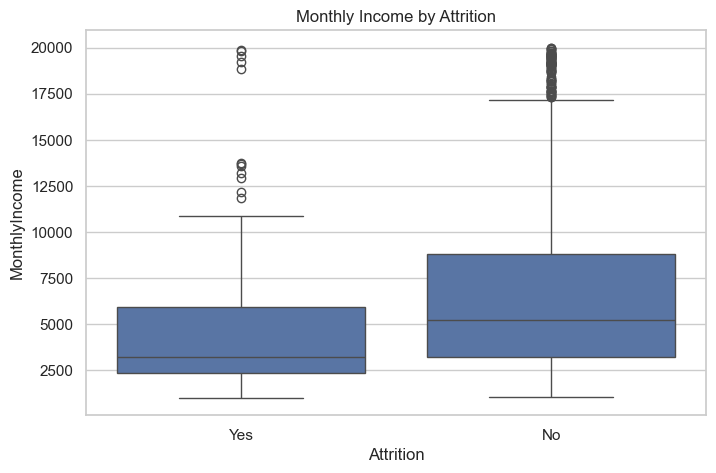

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income by Attrition")
plt.show()

In [15]:
# Median comparison
df.groupby("Attrition")["MonthlyIncome"].median()


Attrition
No     5204.0
Yes    3202.0
Name: MonthlyIncome, dtype: float64

#### Interpretation: Monthly Income and Attrition

The analysis reveals a substantial income disparity between employees who left and those who stayed.

Key observations:

- The median monthly income of employees who stayed is significantly higher than that of employees who left.
- A large proportion of employees who left are concentrated within the lower-to-mid income range.
- High-income employees (above 10,000) show considerably lower attrition rates.

These findings suggest that compensation level may be a strong determinant of employee retention. 
Lower-income employees appear to face a higher turnover risk, whereas higher compensation 
may serve as a retention mechanism.

### 4.2.2 Numerical Variable Comparisons

Beyond compensation, additional numerical variables related to tenure, career progression, and work experience are comparatively analyzed across attrition groups.

Mean-level differences are evaluated to detect structural disparities that may signal underlying economic or career-related determinants of employee departure.

In [16]:
# Mean comparison by Attrition
df.groupby("Attrition")[num_cols].mean().T


Attrition,No,Yes
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987
JobLevel,2.145985,1.637131
JobSatisfaction,2.778589,2.468354
MonthlyIncome,6832.739659,4787.092827


### 4.2.3 Job Level

Job Level reflects the hierarchical position of employees within the organization. Higher job levels are typically associated with increased compensation,  greater responsibilities, and stronger organizational attachment.

In this subsection, we examine whether attrition rates differ across job levels, which may indicate structural or career-related drivers of turnover.


In [17]:
df.groupby("Attrition")["JobLevel"].mean()


Attrition
No     2.145985
Yes    1.637131
Name: JobLevel, dtype: float64

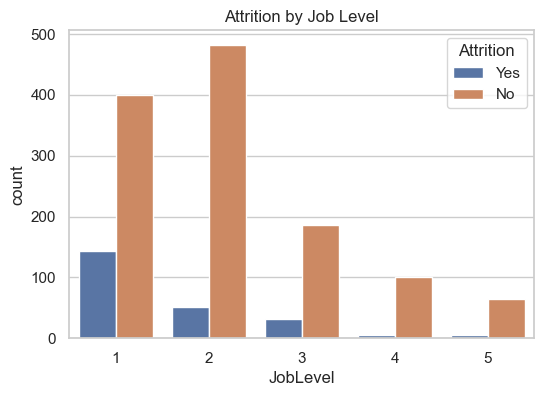

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="JobLevel", hue="Attrition", data=df)
plt.title("Attrition by Job Level")
plt.show()


#### Interpretation: Job Level and Attrition

The distribution of attrition across job levels reveals several insights:

- **Highest Attrition Count:** Job Level 1 exhibits the highest number of employees leaving, approximately 145 individuals.  
- **Lowest Attrition Count:** Job Levels 4 and 5 show the lowest attrition, each with fewer than 10 employees leaving.  
- **Highest Retention:** Job Level 2 has the highest number of employees remaining ("No" category), around 480 individuals.  
- **Overall Trend:** As job level increases from 1 to 5, both total employee count and attrition count decrease, indicating that higher hierarchical positions are associated with lower turnover.

These observations suggest that lower-level employees are more likely to leave the organization, 
possibly due to limited career advancement or compensation opportunities.


### 4.2.4 Stock Option Level

Stock options represent a long-term financial incentive that may enhance 
employee retention by aligning personal financial gains with company performance.

In this subsection, we examine whether attrition varies 
across different Stock Option Levels to determine 
if equity-based incentives correlate with turnover behavior.


In [19]:
# Compare mean Stock Option Level by Attrition
df.groupby("Attrition")["StockOptionLevel"].mean()


Attrition
No     0.845093
Yes    0.527426
Name: StockOptionLevel, dtype: float64

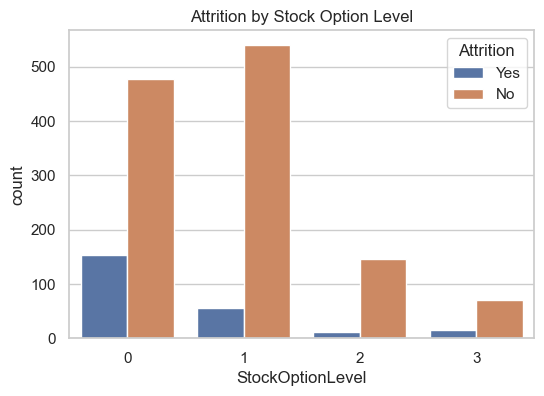

In [20]:
# Visualize distribution of Stock Option Level by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="StockOptionLevel", hue="Attrition", data=df)
plt.title("Attrition by Stock Option Level")
plt.show()


#### Interpretation: Stock Option Level and Attrition

The attrition distribution across Stock Option Levels indicates several key patterns:

- **Highest Attrition Count:** Employees with Stock Option Level 0 exhibit the highest attrition, approximately 155 individuals.  
- **Lowest Attrition Count:** Stock Option Level 2 shows the lowest attrition, around 10 employees.  
- **Highest Retention:** The largest number of employees remaining ("No" category) is observed at Stock Option Level 1, approximately 540 individuals.  
- **Overall Trend:** Moving from Level 0 to Level 1, the number of employees leaving decreases sharply. From Level 1 to Level 3, the total number of employees also decreases.  

These observations suggest that even modest equity-based incentives (e.g., Stock Option Level 1) are associated with increased retention, highlighting the importance of long-term financial incentives in mitigating attrition.


## 4.3 Psychosocial and Work Environment Determinants

Beyond economic incentives, employee turnover can be influenced by 
psychosocial and environmental factors within the workplace. 

These determinants include perceptions of work-life balance, job satisfaction, 
interpersonal relationships, and physical work conditions, all of which 
may contribute to voluntary attrition even when compensation is adequate.

This section investigates the association between these psychosocial factors 
and employee attrition, providing a more holistic understanding 
of turnover drivers beyond purely economic considerations.


### 4.3.1 Work-Life Balance

Work-Life Balance reflects employees' perception of the equilibrium between their professional responsibilities and personal life. Insufficient balance may lead to stress, burnout, and increased likelihood of voluntary attrition.

In this subsection, we analyze whether Work-Life Balance scores differ between employees who left the organization and those who remained, highlighting its role as a psychosocial determinant of attrition.

In [21]:
# Compare mean Work-Life Balance scores by Attrition
df.groupby("Attrition")["WorkLifeBalance"].mean()


Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

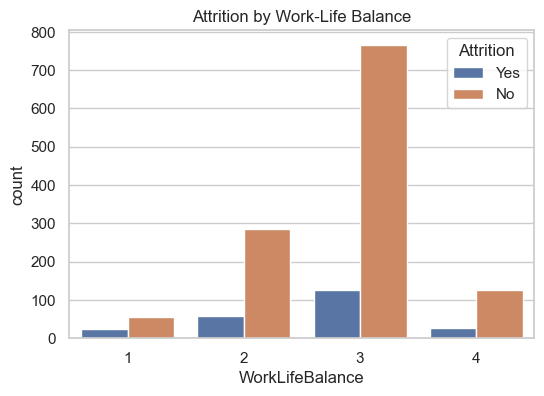

In [22]:
# Visualize Work-Life Balance distribution by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df)
plt.title("Attrition by Work-Life Balance")
plt.show()


#### Interpretation: Work-Life Balance and Attrition

The distribution of attrition across Work-Life Balance levels highlights several key observations:

- **Largest Group:** Employees with a Work-Life Balance score of 3 constitute the largest group, with approximately 890 individuals (765 "No" + 125 "Yes").  
- **Highest Attrition Count:** The highest number of employees leaving is observed in Level 3, with 125 individuals.  
- **Lowest Attrition Count:** Levels 1 and 4 have the lowest attrition, approximately 25 employees each.  
- **Highest Retention:** The largest number of employees remaining ("No") is also at Level 3, around 765 individuals.  
- **Overall Pattern:** Across all levels, the number of employees who remain exceeds the number who leave, indicating that most employees maintain their positions regardless of perceived work-life balance.

These findings suggest that while mid-level Work-Life Balance scores see the highest turnover counts in absolute terms, 
the relative attrition remains moderate, and overall retention is high. 
It provides evidence that psychosocial factors such as work-life balance can influence attrition but are not the sole determinants.


### 4.3.2 Job Satisfaction

Job Satisfaction reflects employees' overall contentment with their role, 
responsibilities, and work environment. Low job satisfaction can contribute to disengagement, 
reduced productivity, and higher likelihood of voluntary attrition.

In this subsection, we examine whether Job Satisfaction scores differ 
between employees who left the organization and those who remained, 
to assess its role as a psychosocial determinant of attrition.


In [23]:
# Compare mean Job Satisfaction scores by Attrition
df.groupby("Attrition")["JobSatisfaction"].mean()


Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

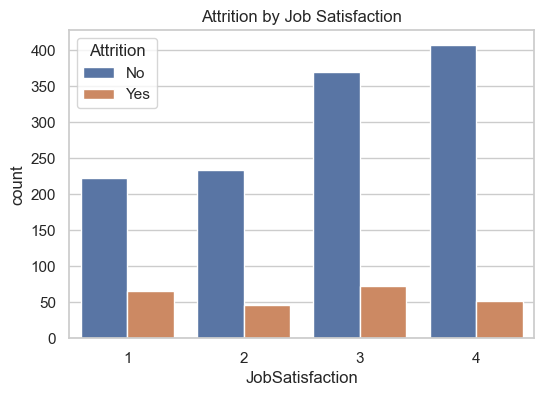

In [24]:
# Visualize Job Satisfaction distribution by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df)
plt.title("Attrition by Job Satisfaction")
plt.show()


#### Interpretation: Job Satisfaction and Attrition

The analysis of attrition by Job Satisfaction levels reveals the following insights:

- **Overall Trend:** As Job Satisfaction increases from 1 to 4, the number of employees remaining in the organization ("No") rises noticeably.  
- **Highest Retention:** Employees with the highest satisfaction level (4) exhibit the greatest retention, with over 400 individuals continuing their employment.  
- **Attrition Rate:** Although the absolute number of employees leaving ("Yes") is low, the proportional attrition decreases as satisfaction reaches level 4.  
- **Implication:** Elevating Job Satisfaction to levels 3 and 4 directly correlates with higher employee retention, highlighting the importance of job contentment in mitigating voluntary turnover.


### 4.3.3 Environment Satisfaction

Environment Satisfaction captures employees' perception of their physical workspace, including ergonomics, comfort, and overall work environment. Low satisfaction may contribute to disengagement, decreased productivity, and increased attrition.

In this subsection, we investigate whether Environment Satisfaction scores differ between employees who left the organization and those who remained, to evaluate its influence as a psychosocial determinant of attrition.


In [25]:
# Compare mean Environment Satisfaction scores by Attrition
df.groupby("Attrition")["EnvironmentSatisfaction"].mean()


Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

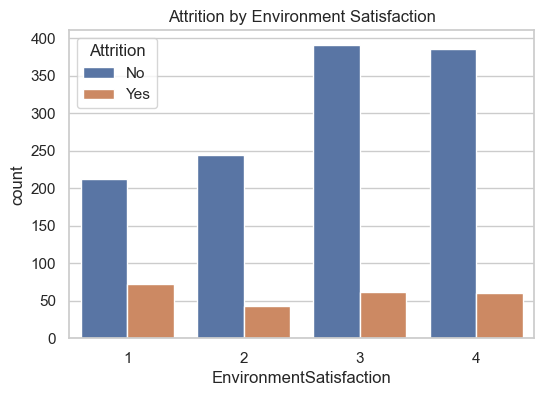

In [26]:
# Visualize Environment Satisfaction distribution by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=df)
plt.title("Attrition by Environment Satisfaction")
plt.show()


#### Interpretation: Environment Satisfaction and Attrition

The analysis of attrition by Environment Satisfaction levels indicates the following patterns:

- **Positive Retention Trend:** As Environment Satisfaction increases, particularly at levels 3 and 4, the number of employees remaining ("No") roughly doubles, approaching 400 individuals.  
- **Highest Risk Group:** Employees with the lowest Environment Satisfaction (level 1) exhibit the highest attrition count ("Yes") relative to other groups.  
- **Stabilization Point:** Attrition counts at levels 3 and 4 are similar and low, suggesting that once a satisfactory work environment threshold is reached (level 3), further improvements have diminishing additional impact on turnover.  
- **Key Difference with Job Satisfaction:** While Job Satisfaction shows peak retention at the highest level (4), Environment Satisfaction achieves a similar retention effect already at level 3, indicating that a "good" environment can be nearly as effective as an "excellent" one in promoting employee loyalty.  

Employees dissatisfied with their work environment are more likely to leave; however, elevating Environment Satisfaction above a moderate level appears sufficient to maintain high retention.


### 4.3.4 Relationship Satisfaction

Relationship Satisfaction captures employees' perceptions of interpersonal dynamics within the organization, including relationships with managers, peers, and teams. 
Poor workplace relationships can lead to disengagement, dissatisfaction, and higher likelihood of attrition.

In this subsection, we examine whether Relationship Satisfaction scores differ between employees who left the organization and those who remained, highlighting its role as a psychosocial determinant of turnover.


In [27]:
# Compare mean Relationship Satisfaction scores by Attrition
df.groupby("Attrition")["RelationshipSatisfaction"].mean()


Attrition
No     2.733982
Yes    2.599156
Name: RelationshipSatisfaction, dtype: float64

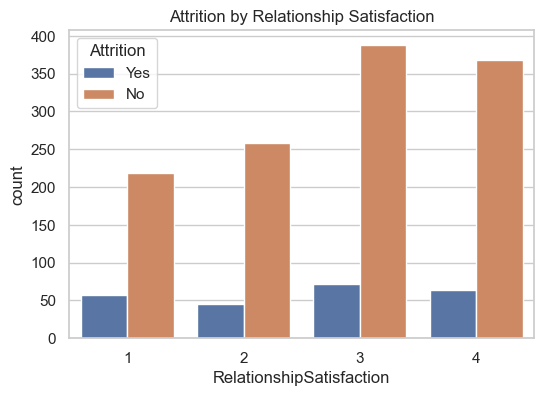

In [28]:
# Visualize Relationship Satisfaction distribution by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=df)
plt.title("Attrition by Relationship Satisfaction")
plt.show()


#### Interpretation: Relationship Satisfaction and Attrition

The analysis of attrition by Relationship Satisfaction levels reveals the following insights:

- **Largest Group:** The majority of employees (approximately 885 individuals) report high Relationship Satisfaction (levels 3 and 4).  
- **Lowest Attrition Count:** The fewest employees leaving ("Yes") are observed at level 2, approximately 45 individuals.  
- **Peak Retention:** The highest number of employees remaining ("No") is at level 3, around 385 individuals.  
- **Critical Observation:** When satisfaction increases from level 3 to 4, there is a slight decrease in both the number of employees remaining and the total employee count. This suggests that level 3 represents an "ideal balance point" for the organization in terms of relationship satisfaction.  

Maintaining Relationship Satisfaction at a moderate to high level (3–4) is sufficient to support high retention, highlighting the importance of healthy workplace relationships in reducing attrition.


### 4.3.5 Distance From Home

Distance From Home measures the physical commute distance between employees' residences and the workplace. Long commute times can negatively affect work-life balance, increase stress, and contribute to voluntary attrition.

In this subsection, we analyze whether Distance From Home differs between employees who left the organization and those who remained, highlighting its potential role as a psychosocial and environmental determinant of attrition.


In [29]:
# Compare mean Distance From Home by Attrition
df.groupby("Attrition")["DistanceFromHome"].mean()


Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

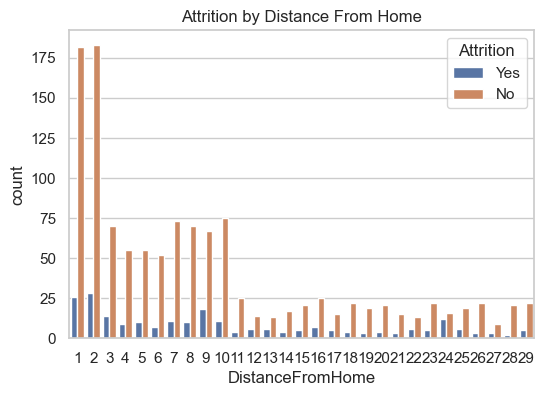

In [30]:
# Visualize Distance From Home distribution by Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="DistanceFromHome", hue="Attrition", data=df)
plt.title("Attrition by Distance From Home")
plt.show()


#### Interpretation: Distance From Home and Attrition

The analysis of attrition by Distance From Home reveals several key patterns:

- **Distance and Density:** The vast majority of employees reside very close to the workplace (1–2 units). As distance increases, the number of employees declines rapidly.  
- **Attrition Count:** The highest absolute number of employees leaving occurs among those living close to the office, reflecting the higher concentration of employees in this range.  
- **Critical Observation:** Although employees living farther away (11 units or more) are fewer, their proportion of attrition relative to retention appears higher, indicating increased risk.  

Most employees live nearby, which naturally leads to more absolute departures in this group. However, employees commuting from farther distances, while fewer, are at relatively higher risk of attrition, highlighting the importance of considering commute distance in workforce retention strategies.


### 4.3.6 General Insights on Psychosocial and Work Environment Determinants

The analysis of psychosocial and work environment factors indicates that employee retention is strongly influenced by both subjective perceptions and physical conditions at the workplace:

- **Job Satisfaction:** Higher satisfaction levels correlate with significantly greater retention, demonstrating that contentment with work responsibilities is a key predictor of attrition.  
- **Environment Satisfaction:** Employees reporting moderate to high satisfaction with their physical work environment (level 3 and above) show substantially lower attrition, highlighting the importance of comfortable and supportive workspaces.  
- **Relationship Satisfaction:** Positive interpersonal relationships, particularly at a moderate to high satisfaction level (3–4), reinforce retention, indicating that healthy manager-peer dynamics reduce turnover risk.  
- **Work-Life Balance:** Employees experiencing better work-life balance tend to remain longer, though attrition is not completely eliminated in any single category.  
- **Distance From Home:** Physical proximity to the workplace affects attrition proportionally; employees commuting longer distances exhibit higher relative attrition risk despite smaller absolute numbers.

**Conclusion:** Overall, psychosocial and environmental factors collectively contribute to employee retention, with higher satisfaction and reasonable commute distances mitigating the likelihood of attrition. These insights provide actionable guidance for human resource management in addressing non-monetary drivers of turnover.


# 5. Feature Engineering

Feature engineering was conducted to prepare the dataset for predictive modeling while preserving the interpretability of psychosocial and organizational determinants of employee attrition.

First, non-informative and constant variables (EmployeeCount, StandardHours, EmployeeNumber) were removed, as they do not contribute meaningful variance to the modeling process.

Psychosocial variables — WorkLifeBalance, JobSatisfaction, EnvironmentSatisfaction, and RelationshipSatisfaction — were intentionally retained as separate predictors. This allows the analysis to evaluate the individual predictive contribution of each psychosocial dimension rather than aggregating them into a composite score.

Categorical variables were transformed into numerical format using one-hot encoding to prevent artificial ordinal assumptions.

To avoid data leakage, scaling procedures will be implemented within the modeling pipeline after the train-test split rather than during preprocessing.


In [31]:
# Drop non-informative columns
cols_to_drop = ["EmployeeCount", "StandardHours", "EmployeeNumber"]
df = df.drop(columns=cols_to_drop, errors="ignore")

# One-hot encoding
cat_cols = [
    "BusinessTravel", "Department", "EducationField", "Gender",
    "JobRole", "MaritalStatus", "Over18", "OverTime"
]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Encode target variable (Yes=1, No=0)
df_encoded["Attrition"] = df_encoded["Attrition"].map({"No": 0, "Yes": 1})

df_encoded.head()



,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


No explicit feature selection technique was applied at this stage. All remaining predictors were retained to allow the models to evaluate the relative importance of organizational, economic, and psychosocial determinants of attrition.


# 6. Model Development

This section focuses on developing and comparing multiple classification models to predict employee attrition.

Three models were selected:

- Logistic Regression (baseline, interpretable linear model)
- Random Forest (ensemble-based, non-linear model)
- Gradient Boosting (sequential ensemble model)

Given the observed class imbalance in the target variable, class weighting strategies were applied where appropriate to ensure balanced learning.

Model performance will be evaluated using stratified 5-fold cross-validation with ROC-AUC as the primary metric. This approach ensures robust performance estimation while preserving the original class distribution across folds.


## 6.1 Train-Test Split

The dataset was divided into training and testing sets using stratified sampling to preserve the original class distribution of the target variable. This ensures a fair and unbiased evaluation of model performance.


In [32]:
# Define features and target
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## 6.2 Model Definition

Three classification algorithms were selected to compare linear and non-linear modeling capabilities. Class weighting was applied where appropriate to address class imbalance.


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ),
    
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    )
}


## 6.3 Cross-Validation Performance

Model performance was evaluated using stratified 5-fold cross-validation. ROC-AUC was selected as the primary evaluation metric due to the imbalanced nature of the dataset.


In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X,
        y,
        cv=skf,
        scoring="roc_auc"
    )
    cv_results[name] = scores.mean()

cv_results_df = pd.DataFrame.from_dict(
    cv_results,
    orient="index",
    columns=["Mean ROC-AUC"]
).sort_values(by="Mean ROC-AUC", ascending=False)

cv_results_df


,Mean ROC-AUC
Logistic Regression,0.823697
Gradient Boosting,0.810744
Random Forest,0.800598


The cross-validation results indicate that Logistic Regression achieved the highest mean ROC-AUC score among the evaluated models. 

While ensemble-based methods such as Random Forest and Gradient Boosting are capable of capturing complex non-linear relationships, the superior performance of the linear model suggests that attrition patterns in this dataset may be largely linearly separable.

Given its strong performance and interpretability advantages, Logistic Regression will be further evaluated on the test set.


# 7. Model Evaluation

Based on cross-validation performance, Logistic Regression was selected as the final model for evaluation on the hold-out test set.

Given the class imbalance in the dataset, evaluation focuses not only on overall accuracy but also on recall, precision, F1-score, and ROC-AUC. 

Particular attention is given to recall for the attrition class (Yes), as correctly identifying employees at risk of leaving is of primary business importance.


## 7.1 Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Train-test split (stratified due to class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1176, 44)
Test size: (294, 44)


## 7.2 Logistic Regression – Model Training


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42))
])

# Fit model
final_model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


## 7.3 Test Set Evaluation


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = final_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



## 7.4 Confusion Matrix


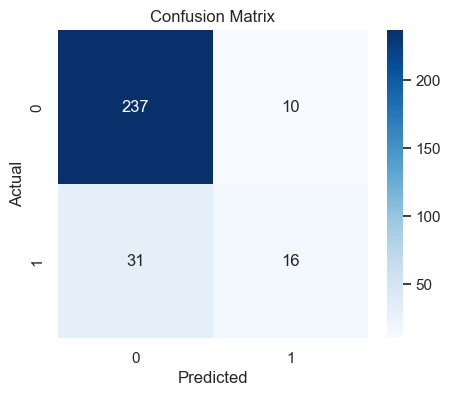

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual: 0 (No)", "Actual: 1 (Yes)"],
    columns=["Predicted: 0", "Predicted: 1"]
)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 7.5 ROC Curve and AUC

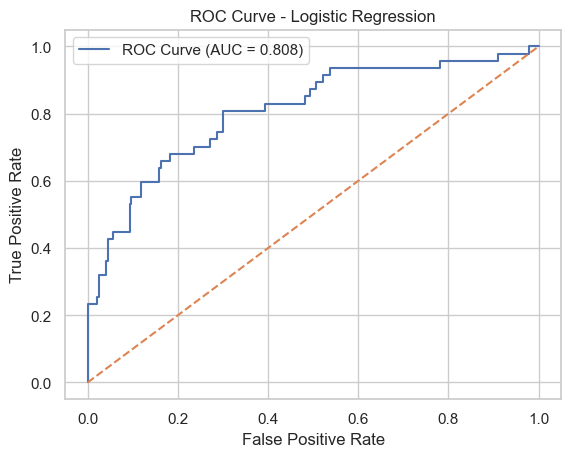

AUC Score: 0.808


In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

print("AUC Score:", round(roc_auc, 3))


### 7.6 Performance Interpretation

The test set evaluation indicates that the model achieves a recall of 0.34 for the attrition class, meaning that approximately 34% of employees who left the company were correctly identified.

However, the precision of 0.62 suggests that when the model predicts attrition risk, it is relatively reliable. This reflects a more conservative prediction behavior, minimizing false positives while potentially missing a substantial portion of at-risk employees.

The ROC-AUC score of 0.808 indicates strong overall discriminative ability, suggesting that the model can effectively distinguish between employees who stay and those who leave, although the default classification threshold may not be optimal for maximizing recall.


## 7.7 Error Analysis

The model demonstrates a conservative prediction pattern, as reflected by the relatively low recall (0.34) for the attrition class. While false positives are minimal, a considerable number of false negatives (31 cases) indicate that many employees who eventually left were not identified as at risk.

This suggests that the default classification threshold (0.5) may be too restrictive in the context of employee attrition prediction. In HR applications, missing at-risk employees can be more costly than conducting additional preventive interventions for false positives.

Future improvements could include threshold optimization, cost-sensitive learning, or class-weight adjustments to better balance recall and precision according to business priorities.


# 8. Model Interpretation

To better understand the underlying drivers of employee attrition, the coefficients of the final Logistic Regression model are examined.

Unlike tree-based models, logistic regression provides interpretable coefficients that indicate the direction and magnitude of each feature’s association with attrition risk.

Positive coefficients indicate increased attrition risk, while negative coefficients indicate protective effects.

In [40]:
# Extract trained logistic regression model
log_reg_model = final_model.named_steps["log_reg"]

# Feature names
feature_names = X_train.columns

# Coefficients
coefficients = log_reg_model.coef_[0]

# Create dataframe
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Absolute effect for sorting
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient,Abs_Coefficient
43,OverTime_Yes,0.864567,0.864567
23,BusinessTravel_Travel_Frequently,0.751247,0.751247
34,JobRole_Laboratory Technician,0.714756,0.714756
16,TotalWorkingYears,-0.555603,0.555603
21,YearsSinceLastPromotion,0.528704,0.528704
11,NumCompaniesWorked,0.487609,0.487609
4,EnvironmentSatisfaction,-0.481659,0.481659
40,JobRole_Sales Representative,0.481459,0.481459
24,BusinessTravel_Travel_Rarely,0.450070,0.450070
8,JobSatisfaction,-0.419417,0.419417


## 8.1 Coefficient Analysis

The table above presents the largest coefficients of the logistic regression model, sorted by absolute magnitude.

Positive coefficients indicate increased attrition risk, while negative coefficients indicate protective effects.

To facilitate interpretation in more practical terms, coefficients are transformed into odds ratios.

In [41]:
import numpy as np

coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])

coef_df.sort_values(by="Odds_Ratio", ascending=False).head(10)

,Feature,Coefficient,Abs_Coefficient,Odds_Ratio
43,OverTime_Yes,0.864567,0.864567,2.373978
23,BusinessTravel_Travel_Frequently,0.751247,0.751247,2.119641
34,JobRole_Laboratory Technician,0.714756,0.714756,2.043688
21,YearsSinceLastPromotion,0.528704,0.528704,1.696732
11,NumCompaniesWorked,0.487609,0.487609,1.628418
40,JobRole_Sales Representative,0.481459,0.481459,1.618434
24,BusinessTravel_Travel_Rarely,0.450070,0.450070,1.568421
39,JobRole_Sales Executive,0.409361,0.409361,1.505855
2,DistanceFromHome,0.393594,0.393594,1.482298
42,MaritalStatus_Single,0.376877,0.376877,1.457725


In [42]:
coef_df[coef_df["Feature"].isin([
    "WorkLifeBalance",
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction",
    "MonthlyIncome"
])]

,Feature,Coefficient,Abs_Coefficient,Odds_Ratio
4,EnvironmentSatisfaction,-0.481659,0.481659,0.617758
8,JobSatisfaction,-0.419417,0.419417,0.657430
18,WorkLifeBalance,-0.307272,0.307272,0.735451
14,RelationshipSatisfaction,-0.288239,0.288239,0.749582
9,MonthlyIncome,0.036367,0.036367,1.037037


## 8.2 Interpretation of Psychosocial and Organizational Factors

The results indicate that psychosocial satisfaction variables demonstrate substantial protective effects against attrition.

EnvironmentSatisfaction (OR = 0.62) and JobSatisfaction (OR = 0.66) emerge as particularly strong protective factors, suggesting that improvements in perceived work environment and job-related fulfillment significantly reduce attrition risk.

WorkLifeBalance (OR = 0.74) and RelationshipSatisfaction (OR = 0.75) also show meaningful protective associations.

In contrast, MonthlyIncome exhibits a comparatively small effect size (OR ≈ 1.04), indicating that financial compensation alone does not strongly differentiate attrition risk within this dataset.

These findings suggest that psychosocial and relational workplace dynamics may play a more substantial role in employee retention than purely financial factors.

## 8.3 Feature Importance Visualization

To visually assess the relative contribution of features, the absolute values of logistic regression coefficients are plotted.

Larger absolute coefficients indicate stronger influence on attrition risk.

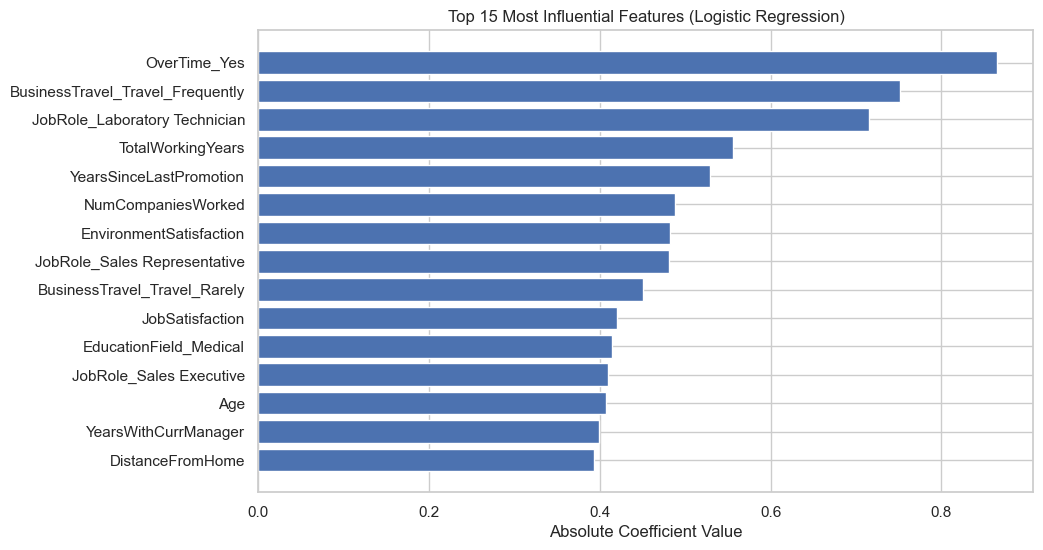

In [43]:
import matplotlib.pyplot as plt

# Top 15 most influential features
top_features = coef_df.sort_values(by="Abs_Coefficient", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.barh(top_features["Feature"], top_features["Abs_Coefficient"])
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 15 Most Influential Features (Logistic Regression)")
plt.show()

## 8.4 Key Insights from Feature Importance

The feature importance visualization highlights overtime and frequent business travel as the strongest predictors of attrition risk.

Notably, psychosocial variables such as EnvironmentSatisfaction and JobSatisfaction rank within the top ten most influential features, demonstrating substantial impact.

In contrast, MonthlyIncome does not appear among the most influential predictors, suggesting that attrition within this dataset may be driven more strongly by work conditions and psychosocial experiences than purely financial factors.

These findings reinforce the importance of organizational climate, workload management, and employee experience in retention strategies.

# 9. Threshold Optimization

By default, logistic regression uses a probability threshold of 0.5 to classify attrition.

However, in HR contexts, failing to identify employees at risk may be more costly than false alarms.

Therefore, we explore alternative probability thresholds to improve recall for the attrition class while monitoring precision.

In [44]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_prob = final_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    
    results.append((t, precision, recall, f1))

threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])
threshold_df

,Threshold,Precision,Recall,F1
0,0.10,0.336283,0.808511,0.475000
1,0.15,0.367816,0.680851,0.477612
2,0.20,0.434783,0.638298,0.517241
3,0.25,0.482143,0.574468,0.524272
4,0.30,0.510638,0.510638,0.510638
5,0.35,0.488372,0.446809,0.466667
6,0.40,0.567568,0.446809,0.500000
7,0.45,0.633333,0.404255,0.493506
8,0.50,0.615385,0.340426,0.438356
9,0.55,0.652174,0.319149,0.428571


## 9.1 Optimized Threshold Evaluation

Based on the threshold analysis, a probability threshold of 0.20 is selected to improve recall for the attrition class.

This adjustment prioritizes identifying employees at risk, even at the cost of increased false positives.

The following evaluation compares model performance under the optimized threshold.

In [45]:
# Choose optimized threshold
optimal_threshold = 0.20

y_pred_opt = (y_prob >= optimal_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report (Threshold = 0.20):\n")
print(classification_report(y_test, y_pred_opt))

cm_opt = confusion_matrix(y_test, y_pred_opt)
cm_opt

Classification Report (Threshold = 0.20):

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       247
           1       0.43      0.64      0.52        47

    accuracy                           0.81       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.81      0.82       294



array([[208,  39],
       [ 17,  30]])

## 9.2 Threshold Optimization Results

Lowering the classification threshold from 0.50 to 0.20 substantially improves recall for the attrition class from 0.34 to 0.64.

This adjustment nearly doubles the number of correctly identified at-risk employees (from 16 to 30 cases).

Although precision decreases from 0.62 to 0.43, this trade-off may be acceptable in HR contexts where missing potential attrition cases carries higher organizational cost than false alarms.

The optimized threshold therefore provides a more risk-sensitive classification strategy.

# 10. Model Explainability (SHAP Analysis)

While logistic regression coefficients provide global interpretability, 
they do not fully explain how features interact for individual employees.

To gain deeper insight into both global and individual risk drivers, 
SHAP (SHapley Additive exPlanations) analysis is conducted.

SHAP values allow us to:
- Quantify each feature’s contribution to attrition risk
- Interpret predictions at both global and individual levels
- Identify actionable intervention points

## 10.1 Preparing the Logistic Regression Model for SHAP

Since the final model was built using a preprocessing pipeline (scaler + logistic regression),
we first extract the trained components and transform the test data accordingly.

In [46]:
# Extract trained components from pipeline
scaler = final_model.named_steps["scaler"]
log_reg_model = final_model.named_steps["log_reg"]

# Scale test data
X_test_scaled = scaler.transform(X_test)

## 10.2 SHAP Explainer Initialization

For linear models such as Logistic Regression, 
SHAP's LinearExplainer is used to compute feature-level contributions.

In [47]:
import shap

explainer = shap.LinearExplainer(log_reg_model, X_test_scaled)
shap_values = explainer(X_test_scaled)

c:\Users\melis\anaconda3\envs\hr-project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 10.3 Global Feature Importance (SHAP Summary Plot)

To understand which variables globally drive attrition risk across all employees,
a SHAP summary plot is generated.

This visualization shows:

- Overall importance of each feature
- Direction of impact (risk increasing vs decreasing)
- Distribution of SHAP values across the test dataset

Features at the top have the strongest overall influence on model predictions.

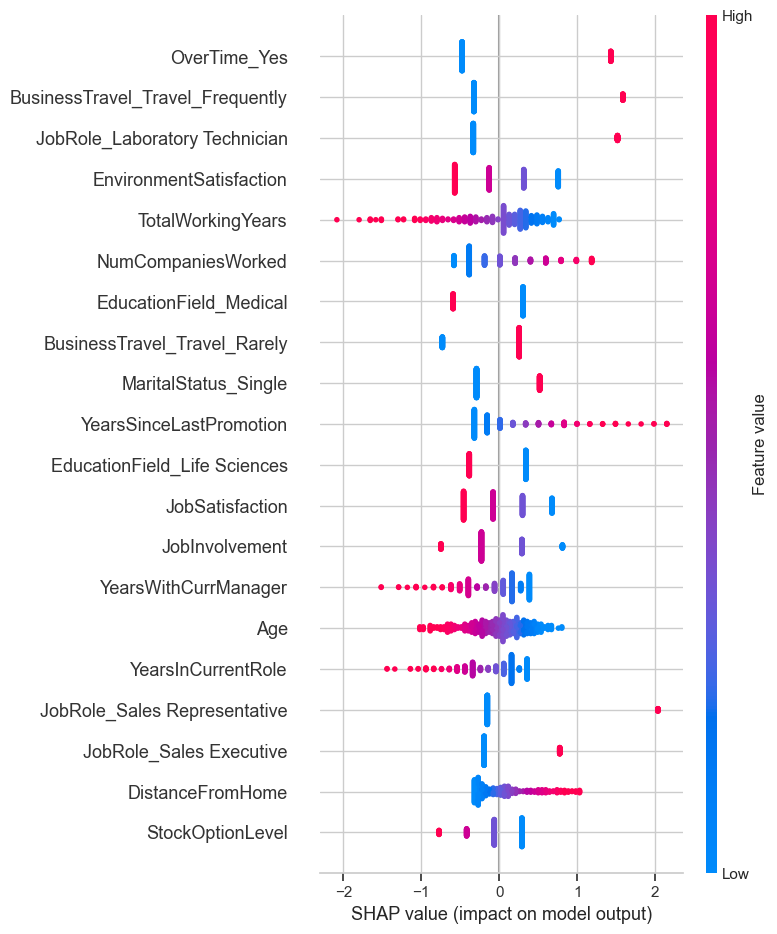

In [48]:
# Convert scaled data back to DataFrame for better visualization
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Global SHAP summary plot
shap.summary_plot(shap_values.values, X_test_scaled_df)

### 10.3.1 Interpretation of Global SHAP Results

The SHAP summary analysis reveals that organizational and structural factors play a dominant role in employee attrition risk.

The strongest risk-increasing factors include:
- Overtime
- Frequent business travel
- Certain job roles (e.g., Laboratory Technician, Sales Representative)
- Long periods without promotion

In contrast, experience-related and psychosocial factors tend to act as protective elements. Higher total working years, longer tenure with the current manager, and higher satisfaction scores are associated with reduced attrition risk.

Psychosocial variables such as EnvironmentSatisfaction and JobSatisfaction demonstrate meaningful but secondary influence compared to structural factors.

These findings suggest that attrition in this dataset is driven more strongly by organizational dynamics than by purely psychological conditions.

## 10.4 Individual Employee Risk Decomposition

While global SHAP analysis provides overall insight into attrition drivers,organizational decision-making often requires understanding risk at the individual level.

In this section, a single employee from the test set with attrition risk is analyzed. 
SHAP values are used to decompose the predicted probability into feature-level contributions.

This allows us to answer:

- Why is this employee at risk?
- Which factors are driving the prediction?
- Which factors are protective?

### 10.4.1 Selecting a High-Risk Employee

A test-set employee with actual attrition (Attrition = 1) is selected to analyze how the model constructed the risk prediction.

In [49]:
import numpy as np

# Find first employee in test set with Attrition = 1
risk_index = np.where(y_test == 1)[0][0]

risk_index

np.int64(4)

### 10.4.2 SHAP Waterfall Explanation

The SHAP waterfall plot below shows how each feature contributes to the final predicted attrition probability for this employee.

Red bars increase risk.
Blue bars decrease risk.
The base value represents the average model prediction.

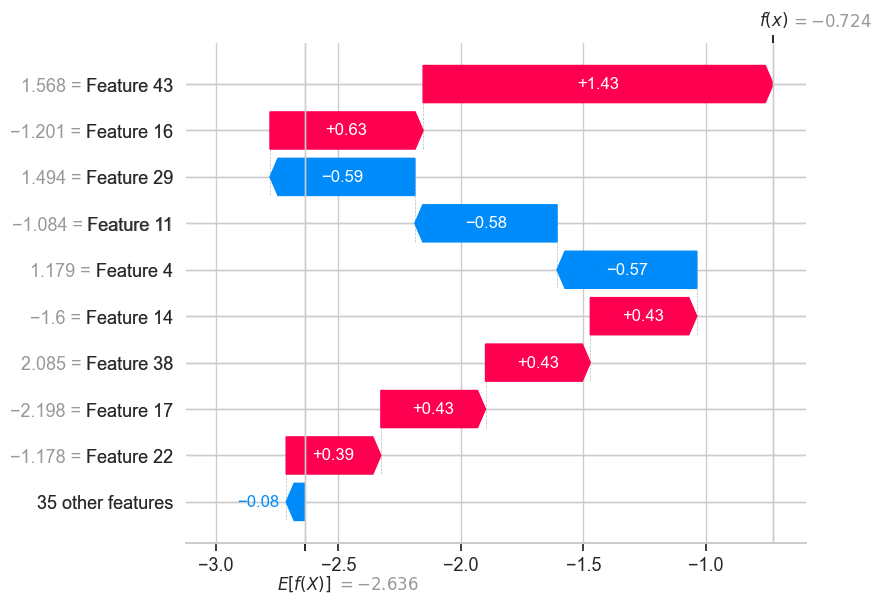

In [50]:
shap.plots.waterfall(shap_values[risk_index])

### 10.4.3 Interpretation of Individual SHAP Results

The SHAP waterfall analysis demonstrates how attrition risk is constructed at the individual level.

For this employee, overtime emerges as the strongest risk driver, substantially increasing predicted attrition probability. Additionally, limited total working experience contributes positively to risk.

Interestingly, psychosocial variables such as relationship satisfaction also contribute to increased risk, indicating that both structural and psychological factors interact in shaping attrition probability.

Protective effects are observed from environmental satisfaction and lower company-switching behavior.

This analysis highlights that attrition risk is multifactorial and individualized, reinforcing the importance of employee-level risk assessment in organizational decision-making.

# 11. Risk Segmentation

While probability scores indicate individual attrition risk, organizational decision-making requires actionable categorization.

Employees are segmented into three risk tiers based on predicted probability:

- Low Risk: Probability < 0.30
- Medium Risk: 0.30 ≤ Probability < 0.60
- High Risk: Probability ≥ 0.60

This segmentation enables HR teams to prioritize monitoring and intervention efforts.

In [51]:
# Get predicted probabilities (class 1 = Attrition)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Create segmentation DataFrame
segmentation_df = X_test.copy()
segmentation_df["Attrition_Probability"] = y_proba
segmentation_df["Actual_Attrition"] = y_test.values

In [52]:
# Define risk tiers
def assign_risk(prob):
    if prob < 0.30:
        return "Low Risk"
    elif prob < 0.60:
        return "Medium Risk"
    else:
        return "High Risk"

segmentation_df["Risk_Segment"] = segmentation_df["Attrition_Probability"].apply(assign_risk)

segmentation_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Probability,Actual_Attrition,Risk_Segment
1061,24,830,13,2,4,78,3,1,2,2033,7103,1,13,3,3,1,1,2,3,1,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,0.073938,0,Low Risk
891,44,1117,2,1,1,72,4,1,4,2011,19982,1,13,3,4,1,10,5,3,10,5,7,7,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,0.002318,0,Low Risk
456,31,688,7,3,3,44,2,3,4,11557,25291,9,21,4,3,1,10,3,2,5,4,0,1,False,True,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,0.109307,0,Low Risk
922,44,1199,4,2,3,92,4,5,1,19190,17477,1,14,3,4,2,26,4,2,25,9,14,13,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,0.006276,0,Low Risk
69,36,318,9,3,4,79,2,1,3,3388,21777,0,17,3,1,1,2,0,2,1,0,0,0,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,0.326510,1,Medium Risk


## 11.1 Risk Distribution Overview

The distribution of employees across risk tiers is analyzed below.

In [53]:
risk_counts = segmentation_df["Risk_Segment"].value_counts()
risk_percent = segmentation_df["Risk_Segment"].value_counts(normalize=True) * 100

risk_summary = pd.DataFrame({
    "Count": risk_counts,
    "Percentage (%)": risk_percent.round(2)
})

risk_summary

,Count,Percentage (%)
Risk_Segment,,
Low Risk,247,84.01
Medium Risk,26,8.84
High Risk,21,7.14


### 11.1.1 Interpretation of Risk Segmentation

The segmentation results indicate that the majority of employees (84%) fall into the low-risk category, suggesting overall workforce stability.

However, approximately 7% of employees are classified as high risk. 
Although numerically small, this segment represents a critical group requiring proactive attention.

This tiered segmentation enables HR decision-makers to prioritize limited resources effectively, focusing intervention efforts on the most vulnerable employees.

## 11.2 Risk Segment Visualization

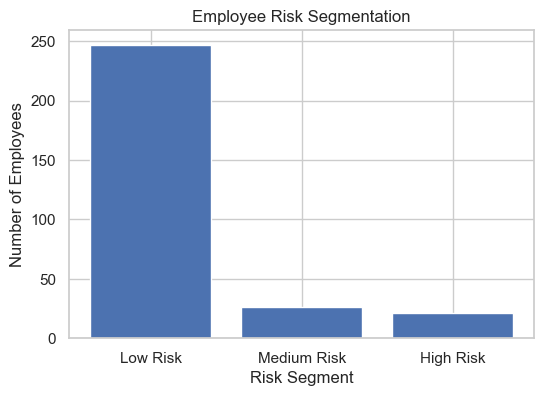

In [54]:
import matplotlib.pyplot as plt

risk_summary_sorted = risk_summary.sort_values("Count", ascending=False)

plt.figure(figsize=(6,4))
plt.bar(risk_summary_sorted.index, risk_summary_sorted["Count"])
plt.title("Employee Risk Segmentation")
plt.xlabel("Risk Segment")
plt.ylabel("Number of Employees")
plt.show()

### 11.2.1 Dashboard Interpretation

The dashboard indicates that the workforce is largely stable, with 84% of employees categorized as low risk.

However, approximately 7% of employees fall into the high-risk category. 
Although relatively small in proportion, this group represents a strategically critical segment for HR monitoring.

The segmentation framework transforms raw probability scores into actionable tiers, 
supporting prioritization and data-driven retention planning.

# 12. Executive Summary

This project developed an interpretable machine learning framework to predict employee attrition and identify its key drivers.

Using Logistic Regression with optimized classification thresholds, the model achieved improved recall performance, enabling better detection of at-risk employees.

SHAP-based explainability analysis revealed that attrition risk is primarily influenced by structural and organizational factors such as overtime, frequent business travel, and delayed promotions. 

Psychosocial variables — including job satisfaction and environmental satisfaction — act as meaningful protective factors, although they play a secondary role compared to structural drivers.

Risk segmentation further translated probability outputs into actionable tiers, identifying approximately 7% of employees as high risk. This segmentation enables targeted monitoring rather than broad, inefficient intervention strategies.

Overall, the framework demonstrates how predictive modeling and explainable AI can support data-driven workforce decision-making.

# 13. Business Implications

The findings of this analysis highlight several important implications for workforce management.

First, attrition risk appears to be more strongly associated with structural and organizational dynamics than purely psychological conditions. Factors such as overtime intensity, promotion delays, and role-specific demands emerge as primary risk drivers.

Second, psychosocial variables function as stabilizing mechanisms rather than dominant predictors. Higher levels of job satisfaction and environmental satisfaction reduce attrition probability, suggesting that workplace climate remains a meaningful retention lever.

Third, segmentation of employees into risk tiers transforms predictive modeling into a decision-support mechanism. By isolating a manageable high-risk segment (~7% of employees), organizations can shift from reactive attrition handling to proactive monitoring.

Overall, this framework demonstrates how interpretable machine learning can bridge analytics and strategic HR planning without sacrificing transparency.

# 14. Conclusion

This project demonstrates how interpretable machine learning can be effectively applied to workforce analytics.

By combining predictive modeling, threshold optimization, explainability techniques (SHAP), and risk segmentation, the analysis moves beyond simple classification toward structured decision support.

The results show that employee attrition is shaped by a combination of organizational structure and psychosocial conditions, with structural drivers playing a more dominant role in this dataset.

Importantly, the use of explainable AI ensures transparency in model behavior, making the framework suitable for real-world HR applications where accountability and interpretability are essential.

This approach illustrates how data science can translate complex modeling outputs into actionable organizational insight.